# Carry out PCA on discrete data using one hot encoding

## Calculate PCA

In [1]:
from pandas import read_csv,get_dummies
from prince import PCA
customer_churn = read_csv('../data/Customer_churn_discrete.csv', index_col="customerID")
labels = customer_churn['Churn']
customer_churn = customer_churn.drop(['Churn'], axis='columns')

### Use one hot encoding

In [2]:
customer_churn_ohe = get_dummies(customer_churn)
customer_churn_ohe.head()

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,tenure_tenure_1,tenure_tenure_2,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges_charges_1,MonthlyCharges_charges_2,MonthlyCharges_charges_3,TotalCharges_total_charges_1,TotalCharges_total_charges_2,TotalCharges_total_charges_3
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
5575-GNVDE,0,1,1,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
3668-QPYBK,0,1,1,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
7795-CFOCW,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
9237-HQITU,1,0,1,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0


### Calculate inertia

In [3]:
pca = PCA(n_components=5)
pca.fit(customer_churn_ohe)
pca.explained_inertia_

array([0.23236686, 0.13085504, 0.08930064, 0.05385094, 0.04497043])

In [4]:
from numpy import cumsum
cumsum(pca.explained_inertia_)

array([0.23236686, 0.36322189, 0.45252253, 0.50637347, 0.5513439 ])

### Save results

In [5]:
from update import update_csv
update_csv("PCAohe",pca.explained_inertia_)

### Visualize results

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (23.24% inertia)', ylabel='Component 1 (13.09% inertia)'>

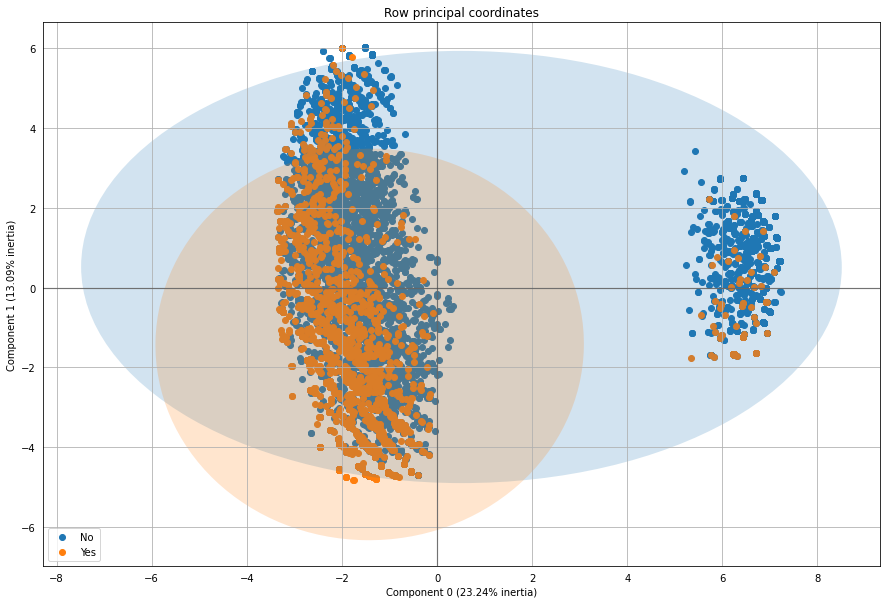

In [6]:
pca.plot_row_coordinates(customer_churn_ohe,figsize=(15, 10),color_labels=labels)

## Measure time

In [7]:
from update import measure_fit_time,measure_transform_time
measure_fit_time("PCAohe",lambda x: PCA(n_components=5).fit(x),customer_churn_ohe)
prefited_PCA = PCA(n_components=5)
prefited_PCA.fit(customer_churn_ohe)
measure_transform_time("PCAohe",lambda x: prefited_PCA.transform(x),customer_churn_ohe)